**Gestión estratégica de datos faltantes: desde la detección hasta la imputación predictiva**

Flujo reproducible para la carga, lectura y tratamiento de datos faltantes


El dataset utilizado, se encuentra en Kaggle, en el siguiente enlace:


https://www.kaggle.com/datasets/kenjee/simulated-missing-value-and-outlier-data

Las variables que conforman el dataset son:
id:identificacion
age:edad
gender: genero
income:renta
days_on_platform: dias en plataforma
city: ciudd
purchases: compras

**1. Cargar el dataset**

In [1]:
from google.colab import files
files.upload()

Saving clv_data.csv to clv_data.csv


{'clv_data.csv': b',id,age,gender,income,days_on_platform,city,purchases\r\n0,0,,Male,126895,14.0,San Francisco,0\r\n1,1,,Male,161474,14.0,Tokyo,0\r\n2,2,24.0,Male,104723,34.0,London,1\r\n3,3,29.0,Male,43791,28.0,London,2\r\n4,4,18.0,Female,132181,26.0,London,2\r\n5,5,23.0,Male,12315,14.0,New York City,0\r\n6,6,,Male,51679,30.0,Tokyo,0\r\n7,7,,Female,53341,43.0,San Francisco,1\r\n8,8,46.0,Male,129157,23.0,New York City,0\r\n9,9,49.0,Female,76842,19.0,Tokyo,2\r\n10,10,,Male,159506,7.0,New York City,0\r\n11,11,,Male,110343,30.0,San Francisco,1\r\n12,12,12.0,Male,130521,12.0,London,1\r\n13,13,,Male,105418,13.0,Miami,0\r\n14,14,,Male,95060,7.0,Tokyo,1\r\n15,15,31.0,Female,226249,20.0,Miami,0\r\n16,16,19.0,Female,51434,18.0,New York City,0\r\n17,17,27.0,Female,177582,2.0,London,0\r\n18,18,10.0,Female,260,32.0,San Francisco,0\r\n19,19,32.0,Female,15174,13.0,Tokyo,1\r\n20,20,40.0,Male,18300,15.0,Tokyo,1\r\n21,21,,Male,67623,40.0,New York City,0\r\n22,22,,Female,39433,36.0,Miami,2\r\n23,23,10.

**2. Lectura del dataset**

In [2]:
#Importar librerías
import pandas as pd # Librería para la manipulación y análisis de datos (tablas, CSV, Excel, SQL, entre otros.)
import numpy as np  # Librería para el cálculo numérico eficiente y manejo de arreglos/matrices

#Lectura del Archivo CSV

import pandas as pd
import numpy as np

# Cargar dataset
#Para archivos almacenados en formato CSV: pd.read_csv
#df objeto del tipo DataFrame
df = pd.read_csv("clv_data.csv")
df
print(df.info())
print(df.describe(include='all'))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   id                5000 non-null   int64  
 2   age               2554 non-null   float64
 3   gender            5000 non-null   object 
 4   income            5000 non-null   int64  
 5   days_on_platform  4859 non-null   float64
 6   city              5000 non-null   object 
 7   purchases         5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB
None
         Unnamed: 0           id          age gender         income  \
count   5000.000000  5000.000000  2554.000000   5000    5000.000000   
unique          NaN          NaN          NaN      2            NaN   
top             NaN          NaN          NaN   Male            NaN   
freq            NaN          NaN          NaN   2553            NaN   


**3.Detección y tratamiento de valores faltantes**

**3.1.Detección**

Cargado el dataset, el siguiente paso consiste en verificar si contiene valores faltantes.
Para ello, se puede utilizar el siguiente código en Python, que permite identificar cuántos valores faltantes se tienen para cada una de las variables que conforman el conjunto de datos.

In [3]:
#Importar librerías
import pandas as pd             # Librería para la manipulación y análisis de datos (tablas, CSV, Excel, SQL, entre otros.)
import numpy as np              # Librería para el cálculo numérico eficiente y manejo de arreglos/matrices
import seaborn as sns           # Librería para la visualización estadística de datos (gráficos más atractivos y de fácil interpretación).
import matplotlib.pyplot as plt # Librería para la creación de gráficos y visualizaciones en 2D, base sobre la que se apoyan otras librerías, como seaborn.

#Detección de valores faltantes
#Se crean dos listas, una con las variables númericas (llamada numericas) y otra, con las variables categóricas (llamada categoricas)
numericas = ['age','Medu', 'freetime','health']
categoricas = ['gender', 'city']

# df.isnull() devuelve un DataFrame con True/False según haya nulos
# df.isnul().sum() devuelve el conteo de nulos por columna
print(" Valores faltantes - Variables numéricas:")
print(df.isnull().sum())

print("\n Valores faltantes - Variables categóricas:")
print(df[categoricas].isnull().sum())


 Valores faltantes - Variables numéricas:
Unnamed: 0             0
id                     0
age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64

 Valores faltantes - Variables categóricas:
gender    0
city      0
dtype: int64


**3.2.Visualización**

Otra forma de identificar la presencia de valores faltantes es a través de una visualización. En este caso, se puede representar la información mediante un mapa de calor.

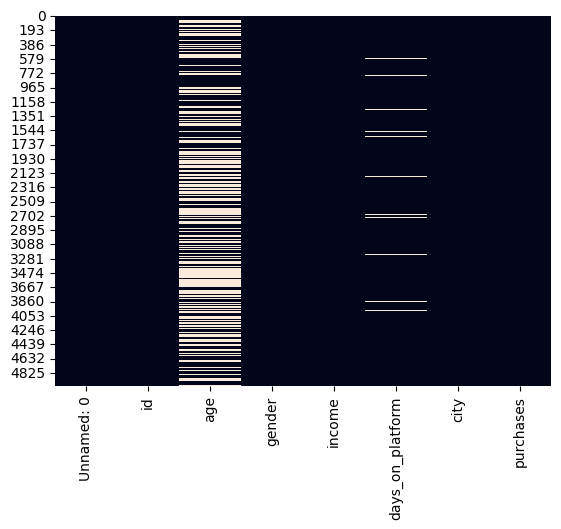

In [4]:
#Importar librerías
import pandas as pd             # Librería para la manipulación y análisis de datos (tablas, CSV, Excel, SQL, entre otros.)
import numpy as np              # Librería para el cálculo numérico eficiente y manejo de arreglos/matrices
import seaborn as sns           # Librería para la visualización estadística de datos (gráficos más atractivos y de fácil interpretación).
import matplotlib.pyplot as plt #Librería para la creación de gráficos y visualizaciones en 2D, base sobre la que se apoyan otras librerías, como seaborn.

#Visualización
#Una vez identificados los valores nulos se procede a visualizarlos, en este caso en un mapa de calor


sns.heatmap(df.isnull(), cbar=False) # Graficaun mapa de calor (heatmap) para visualizar nulos
plt.show()                           # Permite mostrar el gráfico


**3.3. Tratamiento**

 Una vez identificados los valores nulos, el siguiente paso es definir cómo abordarlos. Detectarlos es solo el inicio; lo que realmente impacta en la calidad del análisis es el tratamiento que se les da. Ignorar su presencia puede distorsionar resultados, generar sesgos y comprometer la validez de las conclusiones.
Existen diversas estrategias, cada una con implicancias distintas:
• 	Eliminación selectiva: útil cuando la proporción de datos faltantes es baja y no compromete la representatividad.
• 	Sustitución por estadísticos: como la media, mediana o moda, especialmente en variables numéricas con distribución estable.
• 	Imputación avanzada: mediante modelos predictivos que estiman los valores ausentes en función de patrones internos del dataset.
Finalmente, procedemos a tratar los valores nulos.



In [6]:
#Imputación
#Media o mediana -  variables numéricas
#Moda -  variables categóricas

# Imputamos la variable age con la media
df['age'] = df['age'].fillna(df['age'].mean())
print("Valores perdidos en age después de imputar: ", df['age'].isnull().sum())

# Imputamos la variable days_on_platform con la mediana
df['days_on_platform'] = df['days_on_platform'].fillna(df['days_on_platform'].median())
print("Valores perdidos en days_on_platform después de imputar: ", df['days_on_platform'].isnull().sum())

# Imputamos las variables 'gender', 'city' con la moda
#En la moda, el [0] es para indicar que me devuelva el primer valor porque pueden existir varias modas
df['city'] = df['city'].fillna(df['city'].mode()[0])
print("Valores perdidos en city después de imputar: ", df['city'].isnull().sum())

df['gender']=df['gender'].fillna(df['gender'].mode()[0])
print("Valores perdidos en gender: ", df['gender'].isnull().sum())

Valores perdidos en age después de imputar:  0
Valores perdidos en days_on_platform después de imputar:  0
Valores perdidos en city después de imputar:  0
Valores perdidos en gender:  0


El código anterior, muestra las técnicas más comunes de imputación cuando se tienen valores faltantes. Cabe resaltar que, en el caso de variables numéricas, es recomendable imputar por la media si la variable de interés no tiene valores atípicos, puesto que, la media se ve afectada por valores extremos. De lo contrario, se utiliza la imputación por la mediana.

Para variables categóricas, la imputación se lleva a cabo mediante la moda.

**3.4 Imputación usando modelos predictivos**

 Este método permite rellenar valores faltantes usando el algoritmo de k-vecinos más cercanos (KNN), que estima los valores nulos a partir de la similitud con otras observaciones.

El siguiente código importa el modelo KNNImputer, lo configura para usar 5 vecinos, lo ajusta a los datos de la columna "age", rellena los valores faltantes según los vecinos más cercanos y comprueba que ya no existan valores nulos.

In [7]:
#Se importa la clase KNNImputer desde la librería scikit-learn.
from sklearn.impute import KNNImputer

# Modelo
#Se crea una instancia del imputador.
#n_neighbors=5 indica que para imputar un valor faltante se tomarán en cuenta los 5 registros más cercanos.
#weights="uniform" significa que todos los vecinos tienen la misma importancia al calcular el valor imputado (no se pondera por distancia).
imputer = KNNImputer(n_neighbors=5, weights="uniform")

#Columnas a imputar
cols = ['age', 'days_on_platform']

# Ajuste e imputación de valores
#El método fit() analiza la columna "Price" para entender cómo están distribuidos los datos y preparar el modelo de imputación.
imputer.fit(df[["age"]]) #Si se desean imputar todas las columnas, se cambia Price, por cols

#El método transform() aplica la imputación y devuelve una nueva versión de la columna "Price" con los valores nulos reemplazados.
#El resultado es un array 2D, por eso se usa .ravel(), que lo convierte en un vector 1D para poder asignarlo de vuelta a la columna del DataFrame.
df["age"] = imputer.transform(df[["age"]]).ravel()

print("Valores perdidos en age: ", (df["age"].isnull().sum()))

Valores perdidos en age:  0


**Conclusion : Reconstruyendo Fragmentos Perdidos**

Tratar adecuadamente estos vacíos es esencial para restaurar la coherencia del análisis. Ya sea mediante estrategias simples —como reemplazos por media, mediana o moda— o técnicas más sofisticadas como imputación por KNN, regresiones o árboles de decisión, el objetivo es reconstruir los fragmentos ausentes sin distorsionar el mensaje original.
Solo así se puede explorar los datos con confianza, identificar patrones genuinos y generar insights que reflejen fielmente la realidad que los datos intentan transmitir. La calidad del análisis comienza por la integridad del relato.
Por lo tanto invito a que no ignorar los valores faltantes en los datos: cada uno es una pista que, al ser atendida, transforma la información en conocimiento valioso.
